In [ ]:
# Homework 3 (due 07/12/2024)

# Eigenbears

### Step 1: Data preparation
This link takes you to a page where you can download a set of (computer-generated) images of faces of panda bears and brown bears. Download the data set. Load the images and convert them to gray scale.

### Step 2: Singular value decomposition
Follow the steps in the eigenfaces tutorial to perform an SVD on the bear. Display the first three "eigenbears" (i.e., the images associated with the first three eigenvectors and explain what you see.

### Step 3: Supervised classification

### Step 4: Comparison with unsupervised classification

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os, time

In [71]:
# Step 1: Data preparation

# Collect all images of pandas and brown bears in the train set

# Initiliaze lists for image collection
train_images = []
test_images = []

# set paths to images
for i, images in enumerate([train_images, test_images]):

    datasetname = ['Train','Test'][i]
    folder_path1 = 'PandasBears/{}/Pandas/'.format(datasetname)
    folder_path2 = 'PandasBears/{}/Bears/'.format(datasetname)
    print(folder_path1)

    for folder_path in [folder_path1, folder_path2]:
        
        # go through all files in the folder
        for filename in os.listdir(folder_path):
            
            # find the files that are JPEGs
            if filename.endswith(".jpg") or filename.endswith(".jpeg"):
                
                # Construct full file path
                file_path = os.path.join(folder_path, filename)
    
                # import image
                image = plt.imread(file_path, format='jpeg')
    
                # convert to gray scale
                image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])
    
                # decrease image size by 50%
                image = image[::2,::2]
    
                # add new image to collection
                images.append(image)

    

PandasBears/Train/Pandas/
PandasBears/Test/Pandas/


In [73]:
# Check number of images
len(test_images)

100

In [ ]:
# Look at one image
plt.imshow(images[0][::2,::2],cmap='Greys_r')

In [88]:
A_full = np.transpose(np.array([np.ravel(im) for im in train_images+test_images], dtype='uint8'))
m = np.mean(A_full)

In [105]:
# Step 2
# data matrix
A = np.transpose(np.array([np.ravel(im) for im in train_images], dtype='uint8'))
# mean image
m = 0 #np.mean(A, axis=-1)

In [106]:
A.shape

(16384, 500)

In [107]:
plt.imshow(m.reshape((128,128)))

AttributeError: 'int' object has no attribute 'reshape'

In [108]:
t0 = time.time()
SVD_output = np.linalg.svd((A.T-m).T)
print(time.time()-t0)

48.592995405197144


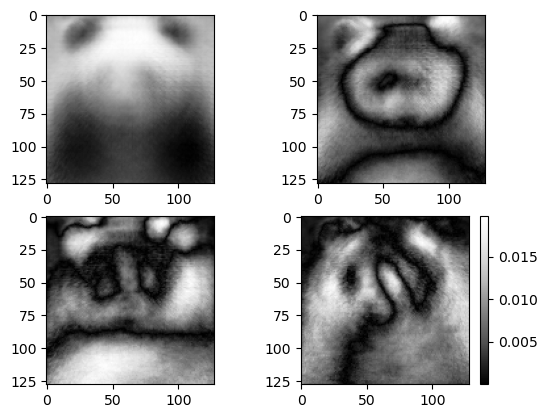

In [117]:
for i in range(4):
    plt.subplot(2,2,1+i)
    plt.imshow(np.abs((SVD_output.U[:,i]).reshape((128,128))), cmap='Greys_r')
plt.colorbar()

In [124]:
# Step 3
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)

neigh.fit(A2.T, np.array(range(500))//250)

KNeighborsClassifier(n_neighbors=1)

In [125]:
predictions = [neigh.predict([np.ravel(test_images[i])-m]) for i in range(100)]

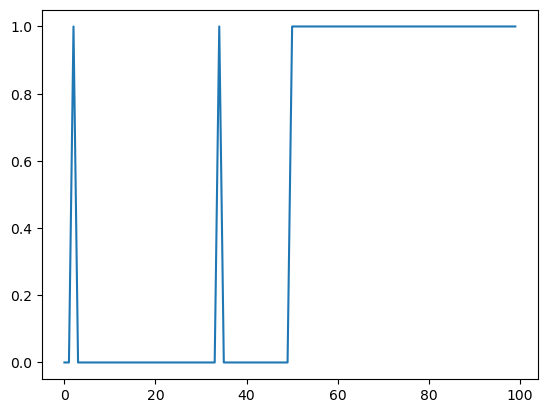

In [126]:
plt.plot(predictions)

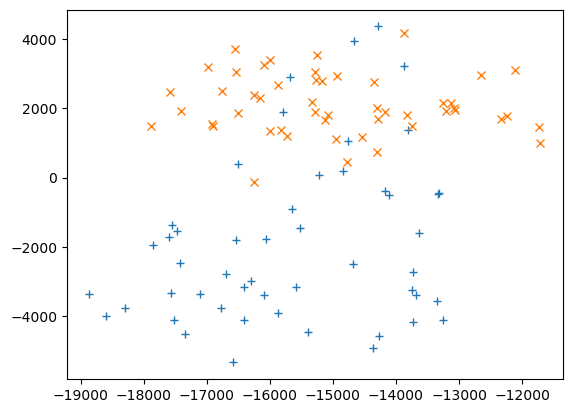

In [113]:
# unsupervised
for i in range(2):
    p1 = [np.dot(SVD_output.U[:,0],np.ravel(x)) for x in test_images[i*50:(i+1)*50]]
    p2 = [np.dot(SVD_output.U[:,1],np.ravel(x)) for x in test_images[i*50:(i+1)*50]]
    plt.plot(p1, p2, marker='+x'[i], lw=0)

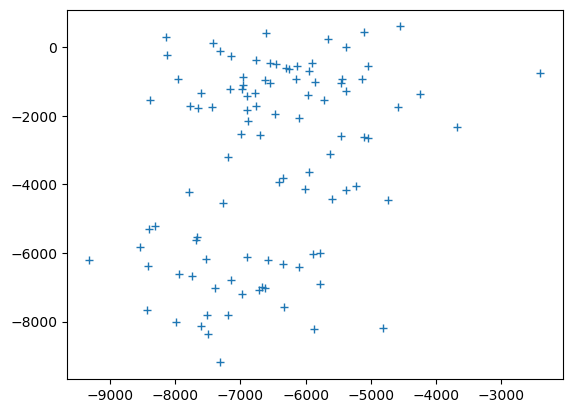